In [7]:
import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
# 15.85828652, 80.78694696
# 15.75418332, 81.02203692
lat_range = (-22.61401087437028, -22.238259929564308)
lon_range = (116.27380371093751, 116.68579101562501)
# la = 22.40
# lo = 69.50
# buf = 0.15
# lat_range = (la-buf, la+buf)
# lon_range = (lo-buf, lo+buf)
# time_range = ('2019-01-15', '2023-02-15')
# display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2b_sen2cor_granule",
                 measurements=["B04","B03","B02", "B08"],
             x=lon_range,
             y=lat_range,
             # time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 1, y: 1481, x: 1326)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-05T02:33:50.590000
  * y            (y) float64 -2.768e+06 -2.768e+06 ... -2.812e+06 -2.812e+06
  * x            (x) float64 1.122e+07 1.122e+07 ... 1.126e+07 1.126e+07
    spatial_ref  int32 6933
Data variables:
    B04          (time, y, x) uint16 1346 1498 1455 1352 ... 1228 1205 1206 1222
    B03          (time, y, x) uint16 1024 995 1013 985 993 ... 847 847 839 841
    B02          (time, y, x) uint16 1022 997 1032 1020 1017 ... 926 908 896 903
    B08          (time, y, x) uint16 1765 1703 1633 1527 ... 1303 1273 1300 1301
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


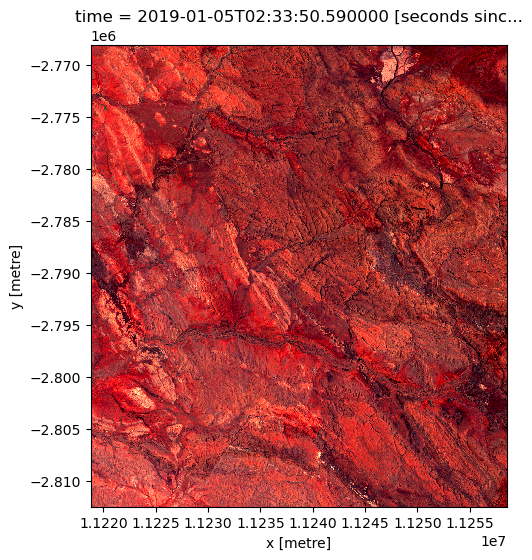

In [15]:
# Load the data from the Datacube
dataset = ds
# scl = ds['SCL_20m']
# clear_pixels = (scl != 3) & (scl != 8) & (scl != 9)
# print(clear_pixels)
# ndvi_masked = ndvi.where(clear_pixels)
# print(ndvi_masked)
rgb(ds, bands=['B04', 'B03', 'B02'], index=[0])

In [10]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(dataset)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.B08 - dataset.B04
band_sum = dataset.B08 + dataset.B04

# Calculate NDVI and store it as a measurement in the original dataset
ndvi = band_diff / band_sum
print(ndvi)

<xarray.DataArray (time: 1, y: 1481, x: 1326)>
array([[[0.13468339, 0.06404249, 0.05764249, ..., 0.04508197,
         0.02561913, 0.06993569],
        [0.18184625, 0.09618988, 0.04336815, ..., 0.04466501,
         0.04568106, 0.0700373 ],
        [0.0681477 , 0.09012078, 0.05022831, ..., 0.05328377,
         0.04569349, 0.03228477],
        ...,
        [0.03165375, 0.07727421, 0.06305129, ..., 0.0211039 ,
         0.04169825, 0.05472637],
        [0.03694268, 0.09902912, 0.05218801, ..., 0.06580367,
         0.04214258, 0.0312256 ],
        [0.03555833, 0.10948905, 0.04797742, ..., 0.02744148,
         0.03750998, 0.03131193]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-05T02:33:50.590000
  * y            (y) float64 -2.768e+06 -2.768e+06 ... -2.812e+06 -2.812e+06
  * x            (x) float64 1.122e+07 1.122e+07 ... 1.126e+07 1.126e+07
    spatial_ref  int32 6933


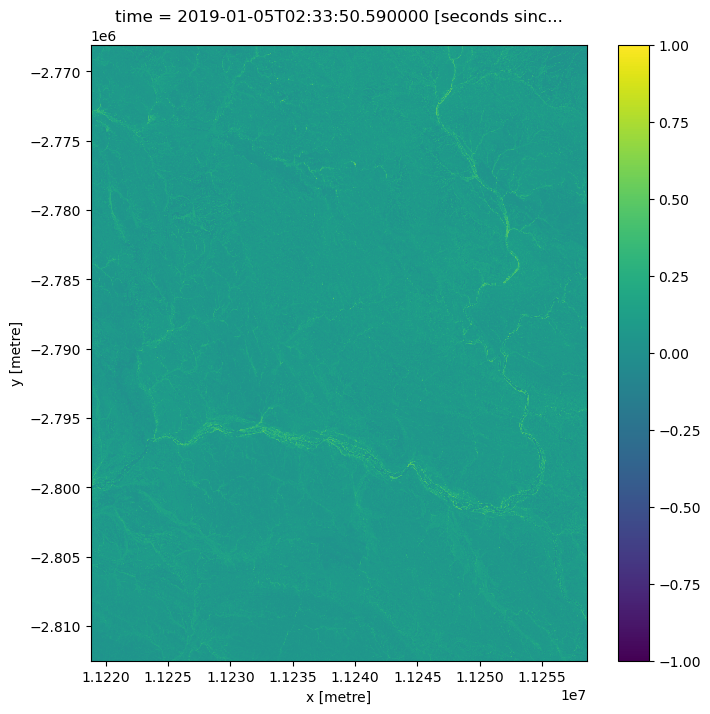

In [16]:
plt.figure(figsize=(8, 8))
ndvi.plot(vmin=-1, vmax=1, col_wrap=1)
plt.show()